In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataFrame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IndonesiaAI/Machine Learning/Minggu 1/Tugas/titanic.csv')

In [14]:
print('Total rows:', dataFrame.shape[0])
print('Total columns:', dataFrame.shape[1])

Total rows: 891
Total columns: 12


In [15]:
dataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
# feature selection -> hapus data yang tidak digunakan
dataFrame = dataFrame.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
dataFrame.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
dataFrame.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q


In [21]:
dataFrame.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [23]:
dataFrame.isnull().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [24]:
dataFrame.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [25]:
dataFrame.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [26]:
mean_age = dataFrame['Age'].mean()
mean_age

29.69911764705882

In [27]:
dataFrame['Age'] = dataFrame['Age'].fillna(mean_age)

In [28]:
dataFrame.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [29]:
dataFrame[dataFrame['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [30]:
dataFrame['Embarked'].fillna("No Embarked", inplace = True)

In [31]:
dataFrame.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
dataFrame['Age'] = dataFrame['Age'].astype('int64')
dataFrame.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

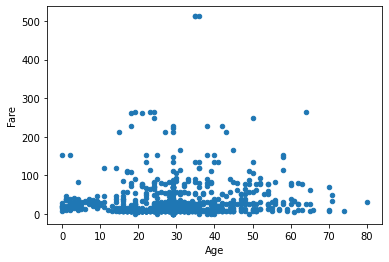

In [33]:
dataFrame.plot(kind='scatter', x='Age', y='Fare')
plt.show()

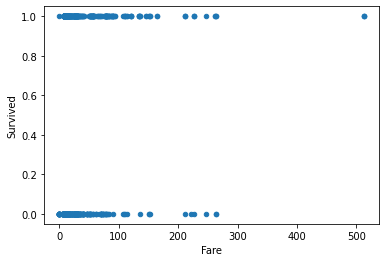

In [34]:
dataFrame.plot(kind='scatter', x='Fare', y='Survived')
plt.show()

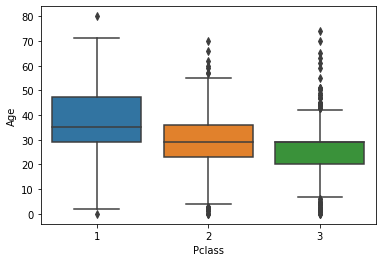

In [35]:
sns.boxplot(data=dataFrame, x=dataFrame['Pclass'], y=dataFrame['Age'])
plt.show()

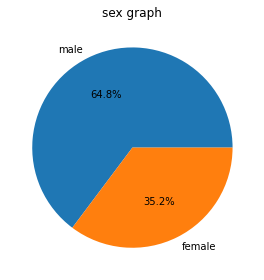

In [36]:
dfs1 = dataFrame['Sex'].value_counts()
dfs2 = dataFrame['Sex'].value_counts().index.tolist()
myexplode = [0,0,0,0.5,1.5]

plt.pie(dfs1, labels=dfs2, autopct = '%1.1f%%')
plt.title("sex graph")
plt.tight_layout()
plt.show()

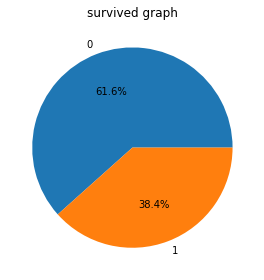

In [37]:
dfs1 = dataFrame['Survived'].value_counts()
dfs2 = dataFrame['Survived'].value_counts().index.tolist()
myexplode = [0,0,0,0.5,1.5]

plt.pie(dfs1, labels=dfs2, autopct = '%1.1f%%')
plt.title("survived graph")
plt.tight_layout()
plt.show()

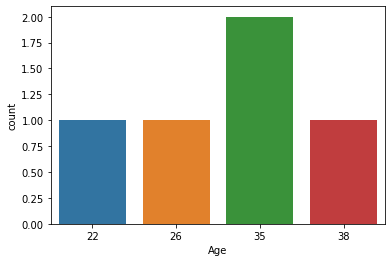

In [38]:
sns.countplot(x=dataFrame['Age'].head())

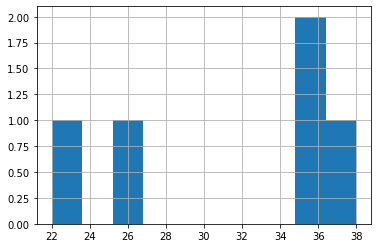

In [39]:
dataFrame['Age'].head().hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


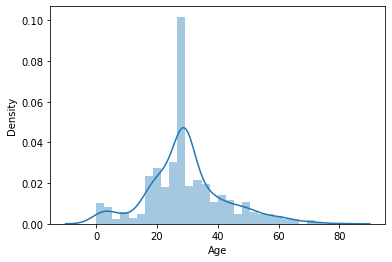

In [40]:
sns.distplot(dataFrame['Age'], kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


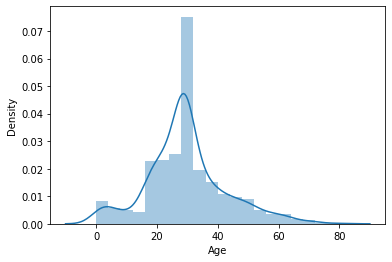

In [41]:
sns.distplot(dataFrame['Age'], bins=20)
plt.show()

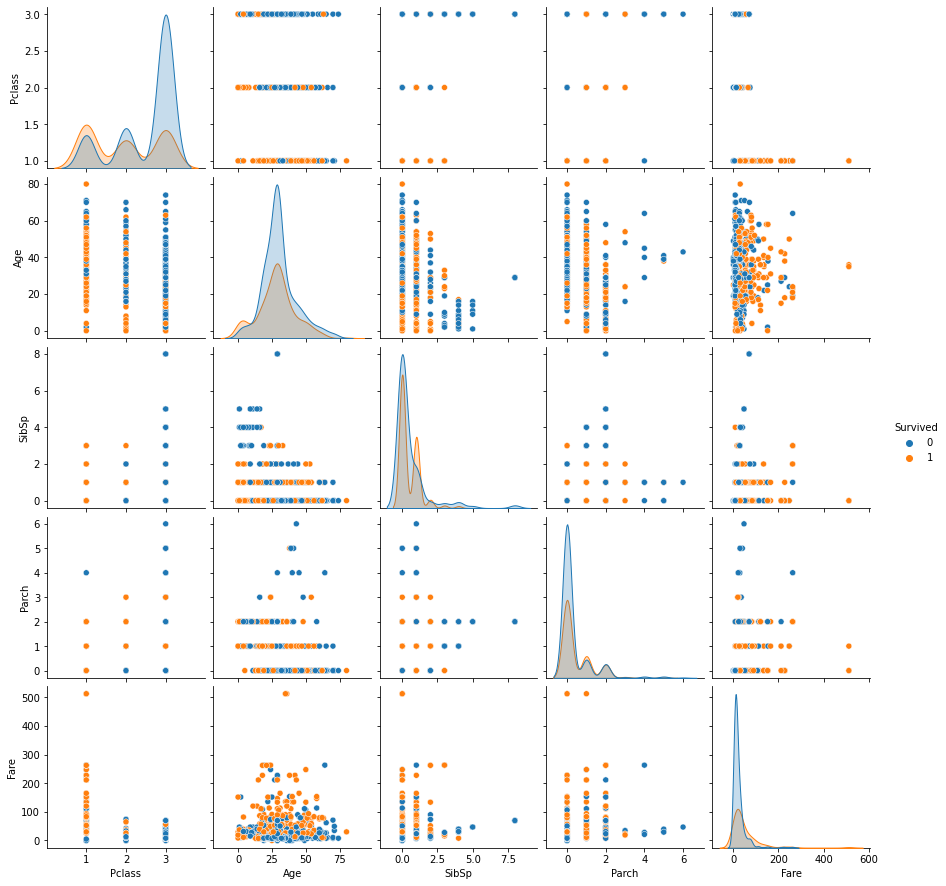

In [42]:
sns.pairplot(data=dataFrame, hue='Survived')
plt.show()

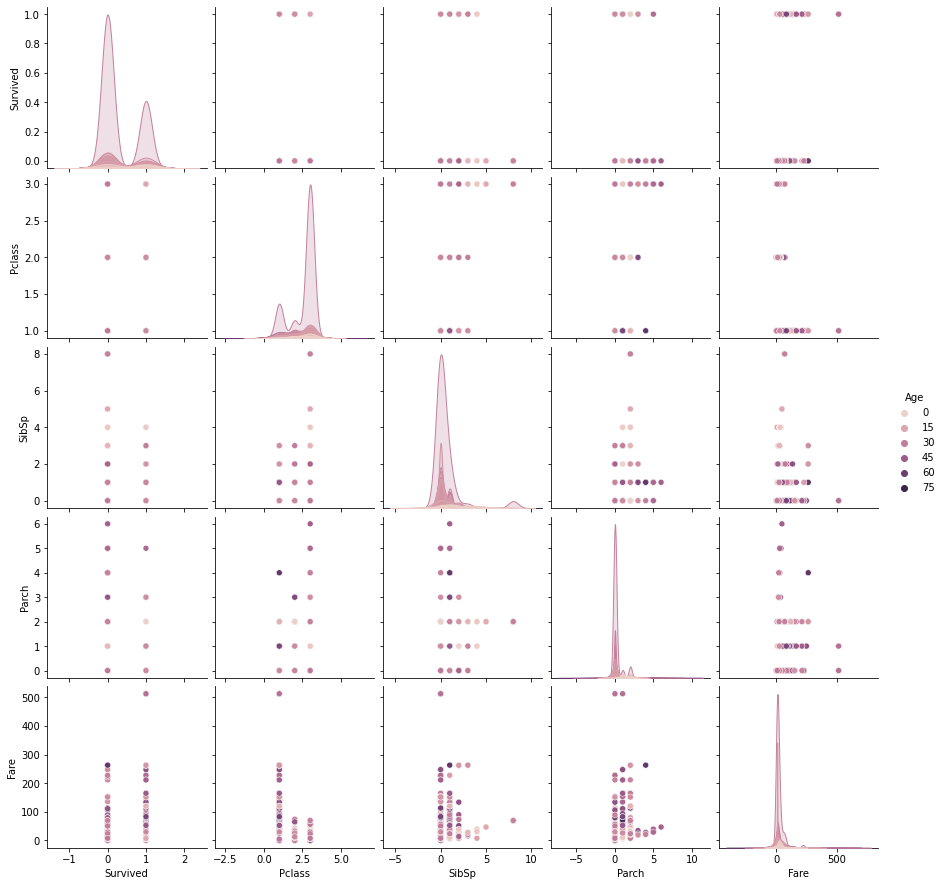

In [44]:
sns.pairplot(data=dataFrame, hue='Age')
plt.show()

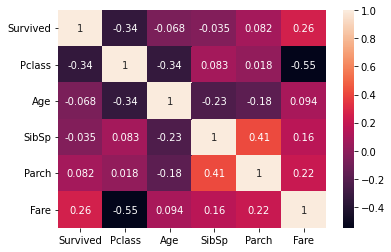

In [45]:
sns.heatmap(data=dataFrame.corr(), annot=True)
plt.show()